<a href="https://colab.research.google.com/github/vcfq/Competencia-y-Regulaci-n/blob/main/Pregunta1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pregunta 1

In [1]:
import pandas as pd

url_base1 = 'https://github.com/vcfq/Competencia-y-Regulaci-n/raw/refs/heads/main/base1.xlsx'
url_base2 = 'https://github.com/vcfq/Competencia-y-Regulaci-n/raw/refs/heads/main/base2.xlsx'

df_1 = pd.read_excel(url_base1)
df_2 = pd.read_excel(url_base2)

--------
Estadística Descriptiva
--------

-----

Prestadores a lo largo del tiempo

-----

In [2]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#merge de bases
df = df_1.merge(df_2, on="ciudad")
df["poblacion_total"] = df["poblacion_inicial"] * (1 + df["crecimiento_anual"]) ** (df["year"] - 2001)
df["porcentaje_operados"] = df["num_operados"] / df["poblacion_total"]
df.head()

,ciudad,year,prestador,num_operados,tecnologia_alta,infraestructura,puntaje_doctor,precio,poblacion_inicial,crecimiento_anual,poblacion_total,porcentaje_operados
0,1,2001,Clinica_B,2521.478838,0,6.993077,6.820721,9.458984,228037,0.056576,228037.000000,0.011057
1,1,2001,Clinica_A,3327.113736,0,8.313865,8.516229,10.584837,228037,0.056576,228037.000000,0.014590
2,1,2001,Clinica_C,2569.037947,0,5.452967,6.444618,9.180535,228037,0.056576,228037.000000,0.011266
3,1,2001,Publico,2512.660532,0,5.367397,8.169181,10.166758,228037,0.056576,228037.000000,0.011019
4,1,2002,Clinica_A,6000.304696,0,8.743796,8.838369,10.384828,228037,0.056576,240938.509024,0.024904


---

Estadísticas descriptivas

---

          ciudad                                                      year  \
           count       mean       std  min   25%   50%    75%   max  count   
prestador                                                                    
Clinica_A  115.0  10.373913  5.679234  1.0  5.50  10.0  15.00  20.0  115.0   
Clinica_B  162.0   9.895062  5.717585  1.0  5.00   9.5  15.00  20.0  162.0   
Clinica_C  200.0  10.500000  5.780751  1.0  5.75  10.5  15.25  20.0  200.0   
Publico    200.0  10.500000  5.780751  1.0  5.75  10.5  15.25  20.0  200.0   

                        ... poblacion_total                 \
                  mean  ...             75%            max   
prestador               ...                                  
Clinica_A  2006.252174  ...   504753.353537  960322.350790   
Clinica_B  2005.049383  ...   476518.847095  887321.407979   
Clinica_C  2005.500000  ...   490509.161783  960322.350790   
Publico    2005.500000  ...   490509.161783  960322.350790   

          porcenta

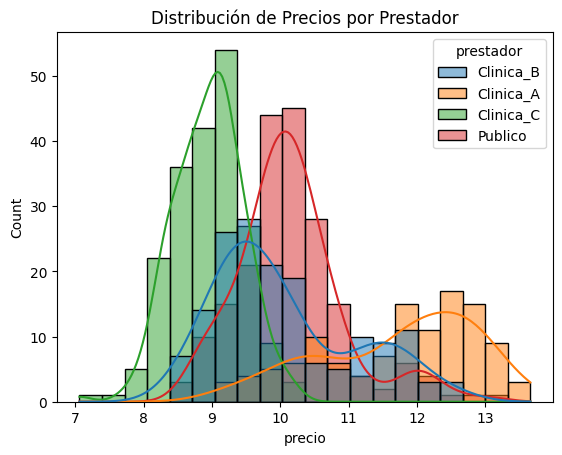

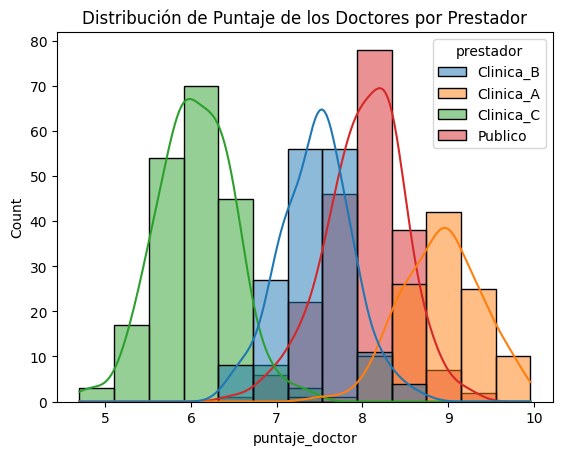

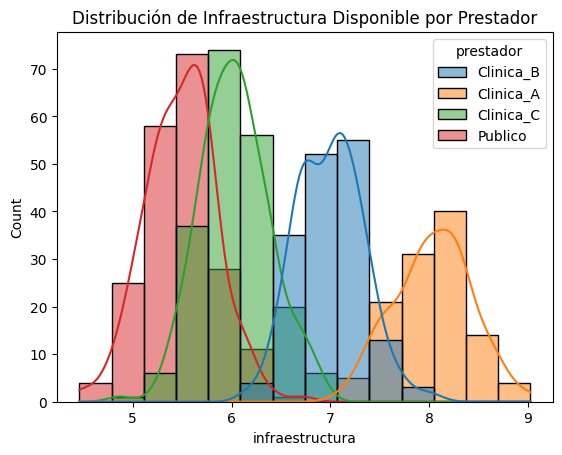

In [3]:
estadisticas = df.groupby("prestador").describe()
print(estadisticas)

sns.histplot(df, x="precio", hue="prestador", kde=True)
plt.title("Distribución de Precios por Prestador")
plt.show()

sns.histplot(df, x="puntaje_doctor", hue="prestador", kde=True)
plt.title("Distribución de Puntaje de los Doctores por Prestador")
plt.show()

sns.histplot(df, x="infraestructura", hue="prestador", kde=True)
plt.title("Distribución de Infraestructura Disponible por Prestador")
plt.show()

-----

Proporción operados


-----

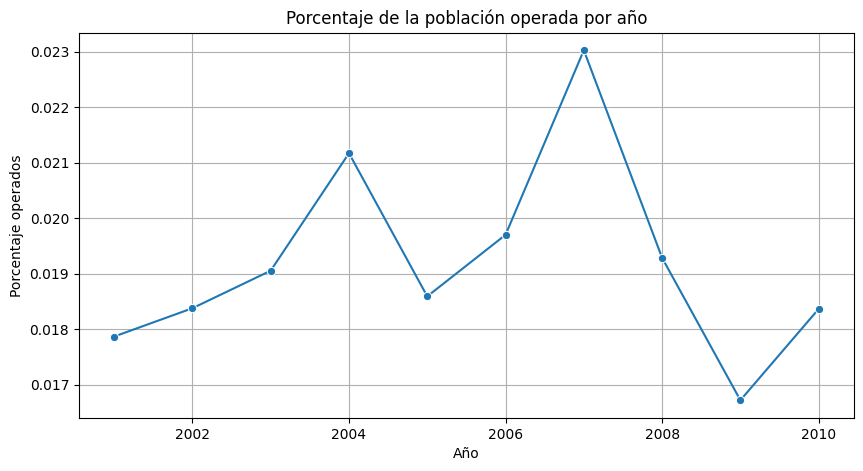

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#evolución evolución operaciones
evolucion = df.groupby("year").agg({
    "num_operados": "sum",
    "poblacion_total": "sum"
}).reset_index()
evolucion["porcentaje_operados"] = evolucion["num_operados"] / evolucion["poblacion_total"]

#gráfico evolución operaciones
plt.figure(figsize=(10, 5))
sns.lineplot(data=evolucion, x="year", y="porcentaje_operados", marker="o")
plt.title("Porcentaje de la población operada por año")
plt.ylabel("Porcentaje operados")
plt.xlabel("Año")
plt.grid(True)
plt.savefig("evolucion_operaciones.pdf", format="pdf")
plt.show()

latex_output = resumen.to_latex(index=False, caption="Estadísticas descriptivas por prestador", label="tab:resumen_prestadores")
with open("resumen_prestadores.tex", "w") as f:
    f.write(latex_output)

files.download("evolucion_operaciones.pdf")

----


Avance en tecnología


----

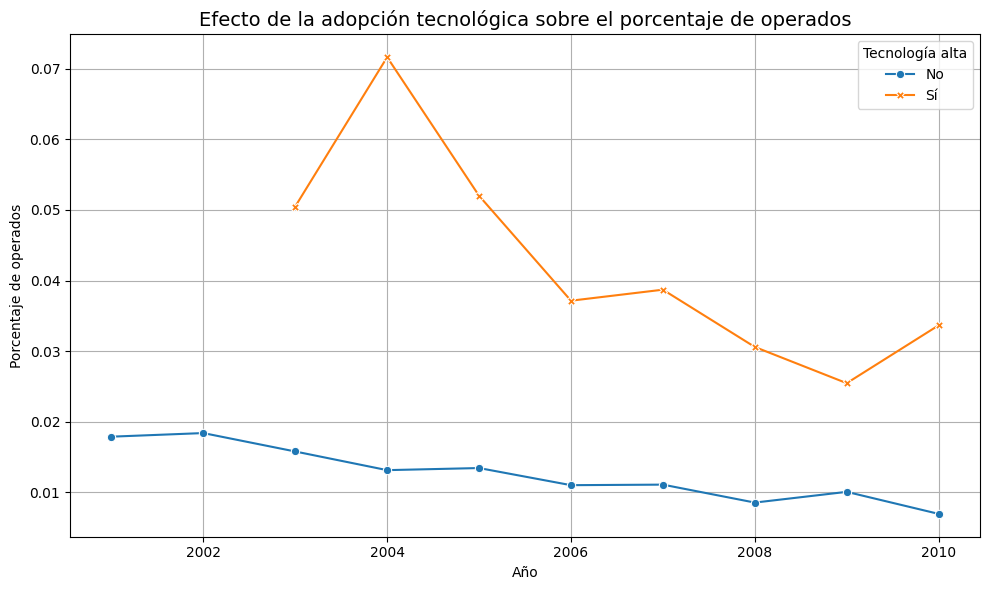

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Número de observaciones por grupo y año:
    year grupo  n_obs
0   2001    No     58
1   2002    No     60
2   2003    No     51
3   2003    Sí      6
4   2004    No     51
5   2004    Sí      8
6   2005    No     48
7   2005    Sí      7
8   2006    No     40
9   2006    Sí     17
10  2007    No     33
11  2007    Sí     23
12  2008    No     31
13  2008    Sí     26
14  2009    No     37
15  2009    Sí     23
16  2010    No     35
17  2010    Sí     23


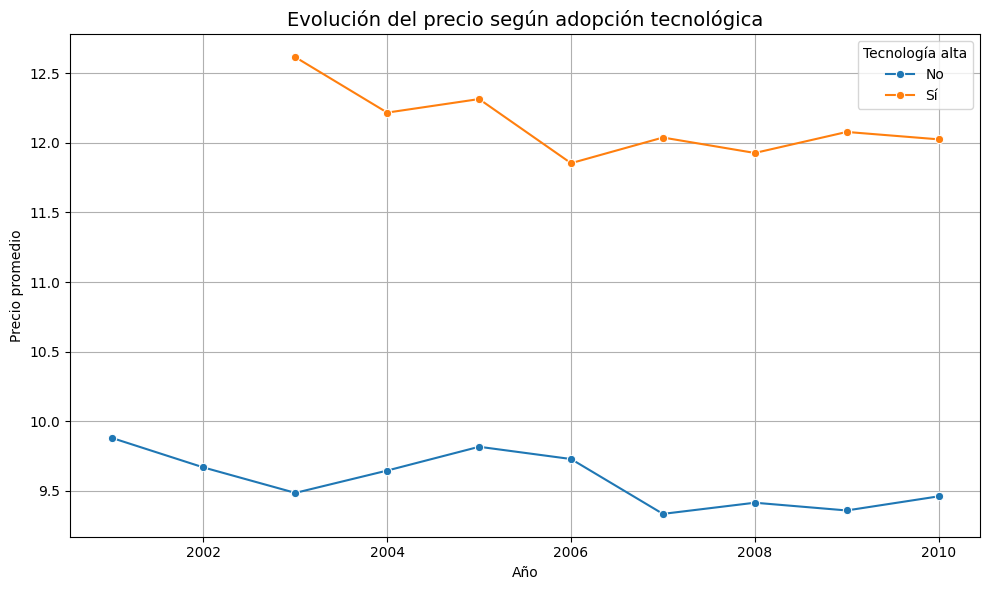

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#efecto del avance de la tecnología
tec = df.groupby(["year", "tecnologia_alta"]).agg({
    "num_operados": "sum",
    "poblacion_total": "sum",
    "prestador": "count"
}).reset_index()
tec["porcentaje_operados"] = tec["num_operados"] / tec["poblacion_total"]

#detalles gráfico tecnología
tec["grupo"] = tec["tecnologia_alta"].map({0: "No", 1: "Sí"})

plt.figure(figsize=(10, 6))
sns.lineplot(data=tec, x="year", y="porcentaje_operados", hue="grupo", style="grupo", markers=True, dashes=False)
plt.title("Efecto de la adopción tecnológica sobre el porcentaje de operados", fontsize=14)
plt.xlabel("Año")
plt.ylabel("Porcentaje de operados")
plt.grid(True)
plt.legend(title="Tecnología alta")
plt.tight_layout()
plt.savefig("efecto_tecnologia.pdf", format="pdf")
plt.show()
files.download("efecto_tecnologia.pdf")

print("Número de observaciones por grupo y año:")
print(tec[["year", "grupo", "prestador"]].rename(columns={"prestador": "n_obs"}))

df["tecnologia_grupo"] = df["tecnologia_alta"].map({0: "No", 1: "Sí"})

#ahora efecto en precios
precio_tecnologia = df.groupby(["year", "tecnologia_grupo"])["precio"].mean().reset_index()

#gráfico en tec/precios
plt.figure(figsize=(10, 6))
sns.lineplot(data=precio_tecnologia, x="year", y="precio", hue="tecnologia_grupo", marker="o")
plt.title("Evolución del precio según adopción tecnológica", fontsize=14)
plt.xlabel("Año")
plt.ylabel("Precio promedio")
plt.grid(True)
plt.legend(title="Tecnología alta")
plt.tight_layout()
plt.savefig("efecto_precio_tecnologia.pdf", format="pdf")
plt.show()
files.download("efecto_precio_tecnologia.pdf")


-----
Estimación logit
-----